ROADMAP:

1. Import dataset(names) from txt file
2. Bigram Model:
    ** Creating a bigram Grid (2D MATRIX grid): It will contain alphabet's frequency
    ** Convert it to probablity by taking row-wise sum followed by diving it.
    ** Perform prediction using Multinomial model
    ** Computing the average of negative log likelihood of the bigram Model
3. Implement Bigram model using a very simple Neural Network:
    ** Create a weight tensor(W) of 27*27 using random values between 0 and 1
    ** Created a one-hot encoder of each input of size(1, 27)
    ** Training: Forward pass, backward pass, weight update step
    ** Prediction: Perform prediction using Multinomial mode

In [10]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# importing all the words
words = open('names.txt', 'r').read().splitlines()

In [11]:
N = torch.zeros((27, 27), dtype=torch.int32).to(device)

In [8]:
# Contains the list of all the alphabets in asending order
chars = sorted(list(set(''.join(words)))) 
stoi = {s: i+1 for i,s in enumerate(chars)} # contains the string to index mapping
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()} # contans the index to string mapping

In [9]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

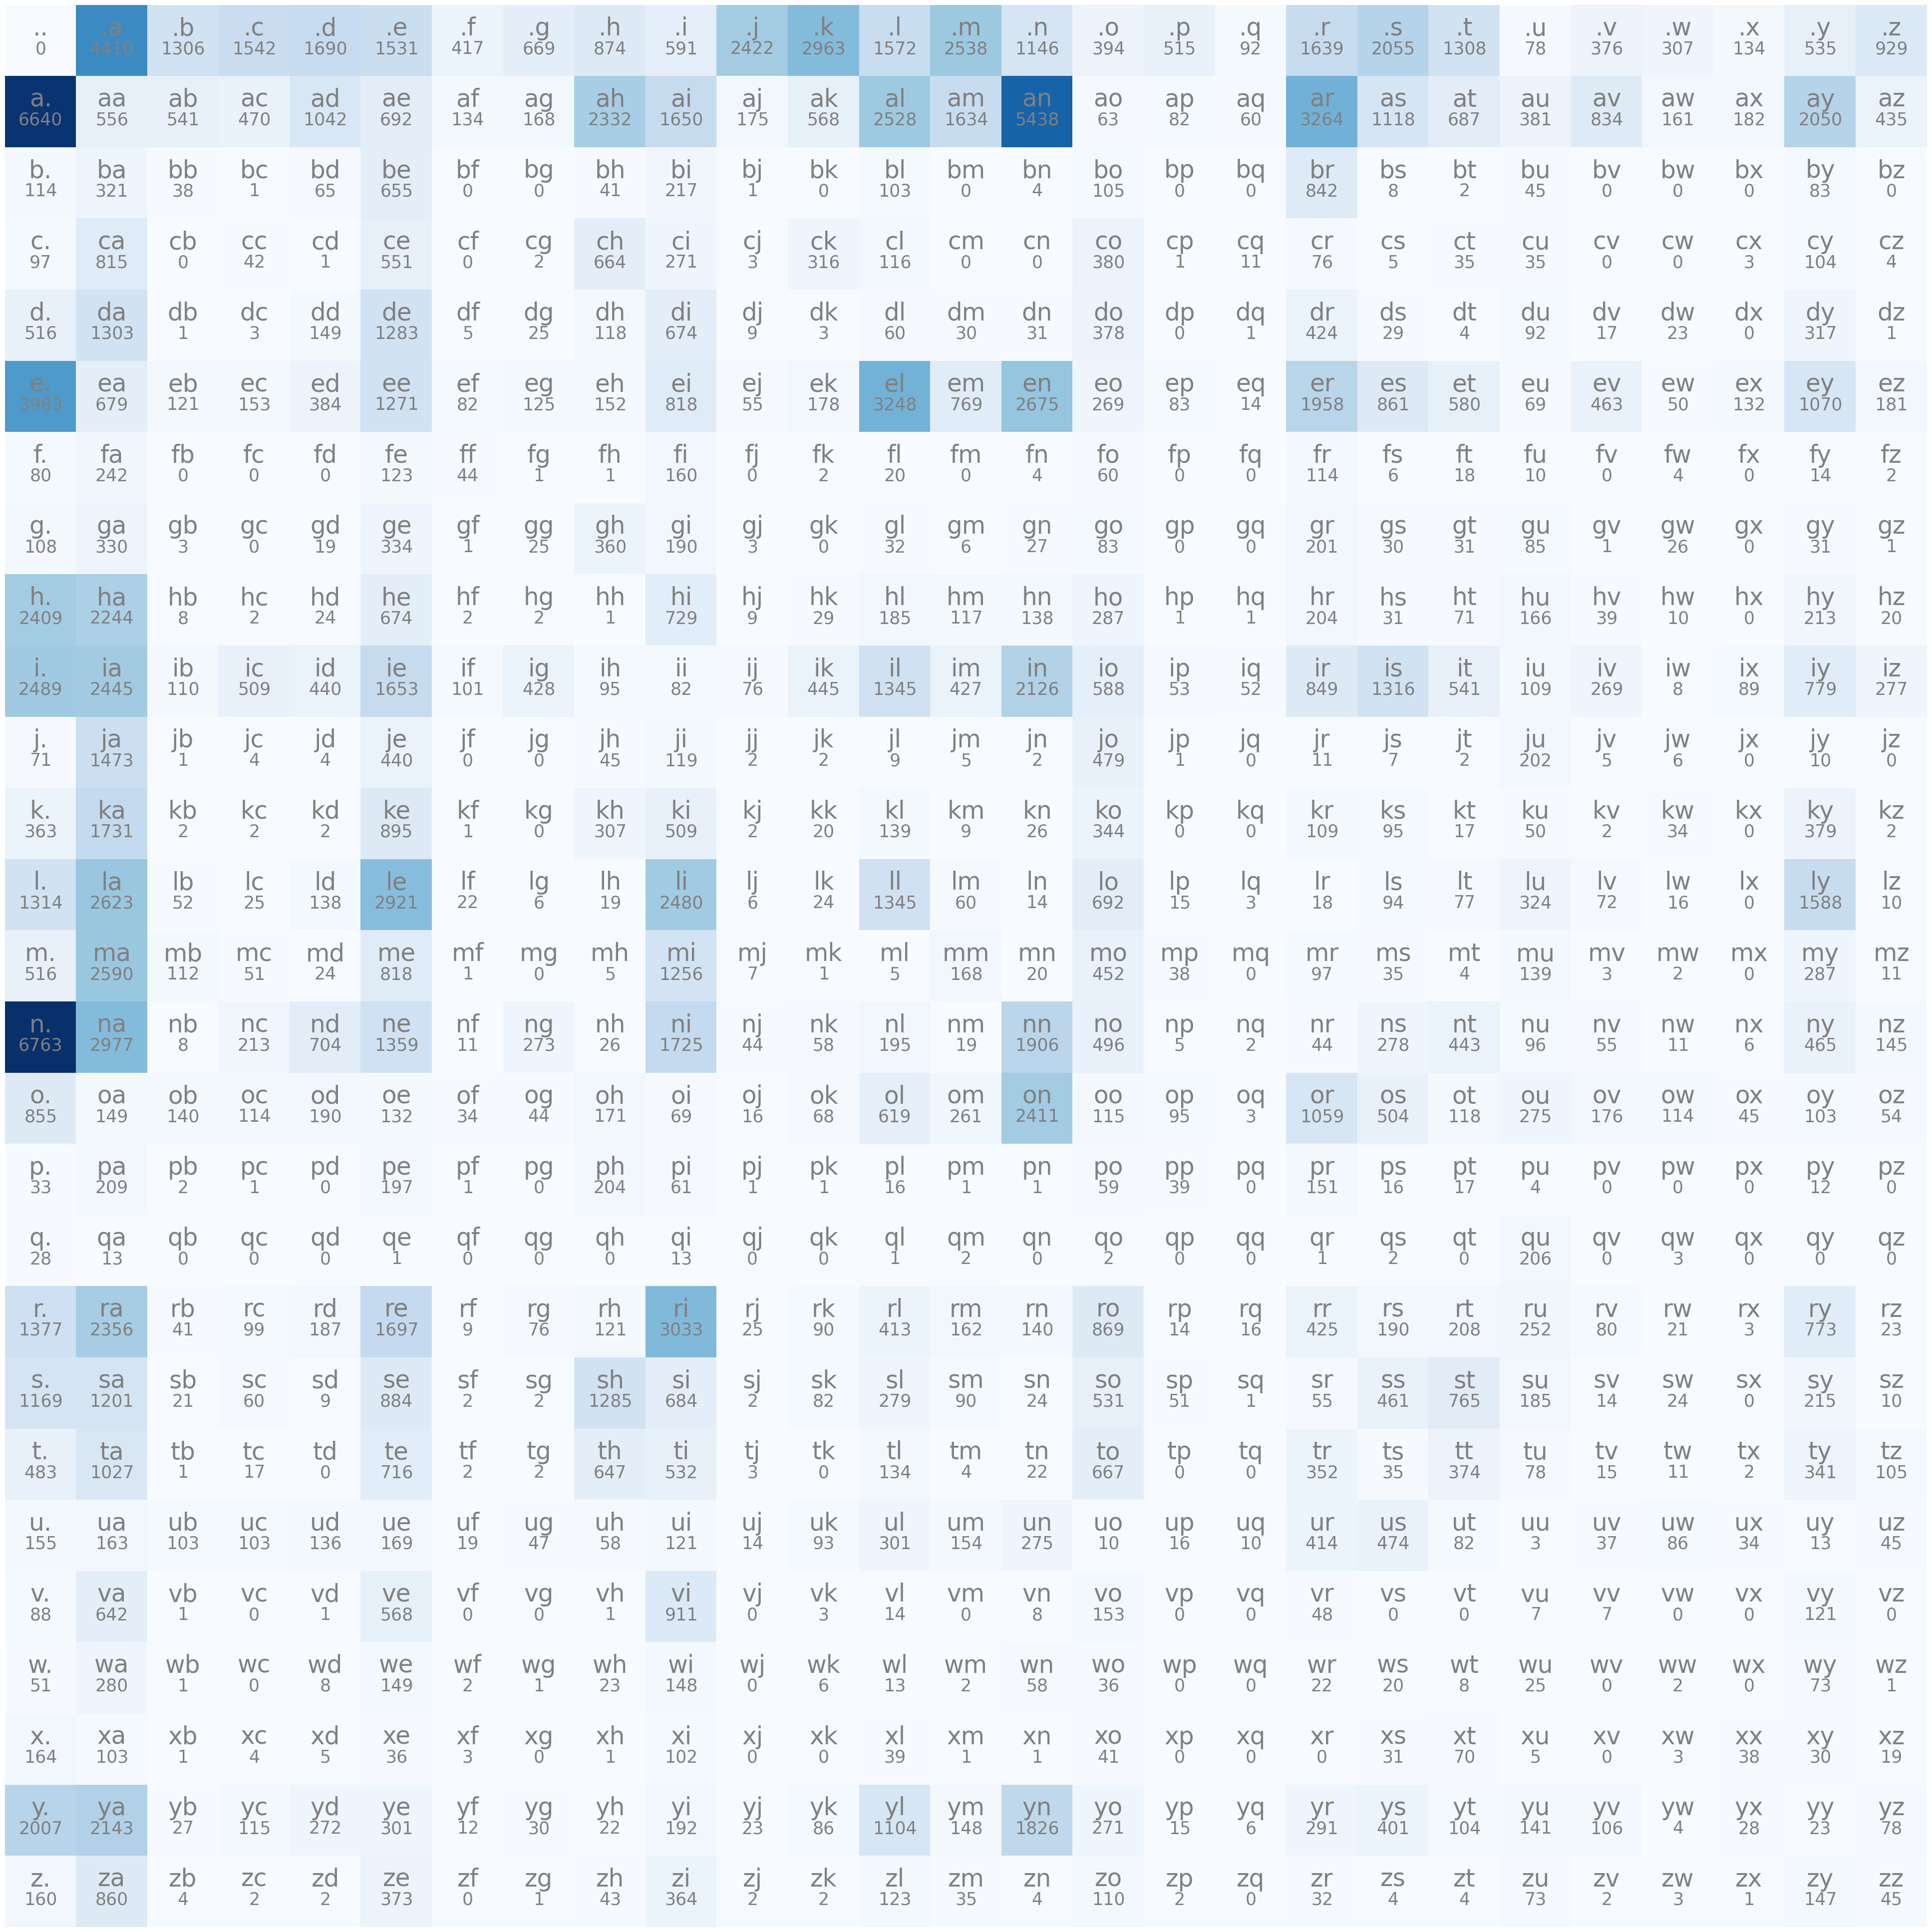

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(50,50))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray', size='35')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray', size='25')
plt.axis('off');

In [7]:
# Converting the Frequecy to probablity.
P = (N + 1).float()
P /= P.sum(1, keepdims=True)

In [ ]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.


GOAL: 
- Maximize likelihood of the data w.r.t model parameters (statistical modeling)
- Equivalent to maximizing the log likelihood
- Equivalent to minimizing negative log likelihood
- Equivalent to minimizing the average negative log likelihood

In [9]:
# Computing the Log Likelihood
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')        

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [ ]:
# Create the dataset for the Neural Network
xs, ys = [], []
for w in words:    
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

tensor([ 0,  5, 13,  ..., 25, 26, 24])

In [14]:
import torch.nn.functional as F

# Initialize the Network: Randomly initialize 27 neurons' weights. Each neuron receives 27 inputs
W = torch.randn((27, 27), generator=g, requires_grad=True)

for _ in range(5):
    # Forward Pass
    xenc = F.one_hot(xs, num_classes=27).float() # Input to the network: one-hot encoding. O/P: Tensor(228146, 27)
    print(xenc.shape)
    logits = xenc @ W # predict log-counts: (228146, 27) @ (27, 27) => (228146, 27)
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # Probablities for next character
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    print(loss.item())
    
    # Backward pass
    W.grad = None # set to zero the gradient
    loss.backward()
    
    # Update
    W.data += -50 * W.grad

torch.Size([228146, 27])
3.8042871952056885
torch.Size([228146, 27])
3.3971261978149414
torch.Size([228146, 27])
3.160029649734497
torch.Size([228146, 27])
3.010564088821411
torch.Size([228146, 27])
2.9159188270568848


In [18]:
# finally, predictions using 'neural net' model
for i in range(5):
  
  out = []
  ix = 0
  while True:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    print(xenc.shape, ix)
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  # print(''.join(out))

torch.Size([1, 27]) 0
torch.Size([1, 27]) 9
torch.Size([1, 27]) 3
torch.Size([1, 27]) 23
torch.Size([1, 27]) 22
torch.Size([1, 27]) 3
torch.Size([1, 27]) 24
torch.Size([1, 27]) 0
torch.Size([1, 27]) 3
torch.Size([1, 27]) 15
torch.Size([1, 27]) 3
torch.Size([1, 27]) 8
torch.Size([1, 27]) 1
torch.Size([1, 27]) 14
torch.Size([1, 27]) 0
torch.Size([1, 27]) 18
torch.Size([1, 27]) 1
torch.Size([1, 27]) 8
torch.Size([1, 27]) 16
torch.Size([1, 27]) 21
torch.Size([1, 27]) 17
torch.Size([1, 27]) 22
torch.Size([1, 27]) 25
torch.Size([1, 27]) 12
torch.Size([1, 27]) 20
torch.Size([1, 27]) 15
torch.Size([1, 27]) 12
torch.Size([1, 27]) 17
torch.Size([1, 27]) 24
torch.Size([1, 27]) 1
torch.Size([1, 27]) 0
torch.Size([1, 27]) 1
torch.Size([1, 27]) 6
torch.Size([1, 27]) 20
torch.Size([1, 27]) 6
torch.Size([1, 27]) 18
torch.Size([1, 27]) 1
torch.Size([1, 27]) 25
torch.Size([1, 27]) 12
torch.Size([1, 27]) 21
torch.Size([1, 27]) 16
torch.Size([1, 27]) 5
torch.Size([1, 27]) 9
torch.Size([1, 27]) 5
torch.Siz